# Washington State Amazon Purchasing Behavior Analysis from 2021 - 2023

Abstract:

In this study, we delve into the procurement practices of the Department of Children, Youth, and Families (DCYF) within the framework of Washington State's Emergency Procurement Policy, particularly concerning transactions made through Amazon. Our analysis reveals notable trends and expenditures, shedding light on potential inefficiencies and deviations from established procurement protocols.

Key Findings:

Our investigation uncovers a surge in bulk purchasing by DCYF, with a staggering 92% increase in "Emergency Procurement" spending observed from FY21 to FY23, predominantly concentrated in the post-COVID lockdown period of FY23.

Moreover, our analysis identifies the Department of Social and Health Services (DSHS) as a significant player in bulk acquisitions, notably in the category of "Apparel," where spending exceeds $25,000 per purchase, demonstrating considerable variance compared to other departments.

Further scrutiny of aggregated data highlights curious procurement patterns, such as the Department of Corrections' substantial expenditure on bulk book purchases under the guise of "Emergency Procurement," and the Department of Fish and Wildlife's focus on acquiring "personal laptops" through emergency channels.

While our attempt to predict purchasing patterns through machine learning models yielded inconclusive results, we discovered prevalent keywords like "heavy," "duty," and "pack" enticing Washington State procurement specialists on Amazon.

Research Inquiries:

Our analysis addresses several pertinent questions, including the identification of state agencies purchasing from Amazon, top-spending agencies, variances in spending, common item categories, and peak spending days. Additionally, we explore the highest spending month, trends in Amazon spending, and common items purchased by top departments on peak spending days.

Moreover, we pose advanced statistical inquiries, examining associations between agency purchases and product categories, reduction in dimensionality through PCA, and differences in clusters identified by KMeans clustering.

Context and Implications:

Our study underscores the significance of transparent procurement practices and adherence to established guidelines, particularly in the context of emergency procurements. By analyzing publicly available datasets, we aim to inform taxpayers, promote industry intelligence, and advocate for small business recovery.

Furthermore, our findings raise concerns regarding compliance with RCW 39.26.125, emphasizing the need for greater scrutiny and accountability in procurement processes. As US Bank revises rebates for Amazon purchases, our study underscores the importance of prudent spending and ethical procurement practices.

Conclusion:

While our analysis highlights discrepancies and inefficiencies in procurement practices, it also underscores the potential for further exploration and refinement. By leveraging machine learning and descriptive statistics, we aim to provide actionable insights and contribute to informed decision-making in Washington State's procurement landscape.

In [1]:
#-- Importing liberaries --#

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
#-- Importing the dataset --#
df = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /State_Agency_Amazon_Spend_Fiscal_Year_22 copy.csv')

# Step1 Data import and Cleaning

In [3]:
#-- Inspecting the Head --#
df.head()

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty
0,6,30,2022,NATURAL RESOURCES DEPARTMENT OF,Personal Computer,Asus,323.89,1
1,6,30,2022,NATURAL RESOURCES DEPARTMENT OF,CE,LOBKIN,15.86,2
2,6,30,2022,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,ADXCO,24.85,1
3,6,30,2022,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,Hawaiian Luau Party Porch Sign,23.76,2
4,6,30,2022,FISH AND WILDLIFE DEPARTMENT OF,Apparel,Hajoyful,26.98,1


In [4]:
#-- Inspecting the shape --#
df.shape

(486273, 8)

In [5]:
#-- Getting descriptive statisitcs --#
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month,486273.0,6.290228,3.396592,1.0,3.0,6.00,9.00,12.0
Day,486273.0,15.538076,8.682386,1.0,8.0,15.00,23.00,31.0
Amount,486096.0,90.727673,260.139283,0.0,17.6,35.91,86.23,59075.8
Item_Qty,486273.0,2.297423,5.349342,0.0,1.0,1.00,2.00,777.0


In [6]:
#-- Dropping any rows that may have missing values --# 
df = df.dropna()

In [7]:
#-- Drop all duplicate rows --#
df = df.drop_duplicates()
df.shape

(57712, 8)

In [8]:
df.describe()

,Month,Day,Amount,Item_Qty
count,57712.000000,57712.000000,57712.000000,57712.000000
mean,4.711897,15.594071,97.400194,2.242047
std,3.187739,8.552086,245.656830,4.782808
min,1.000000,1.000000,0.000000,0.000000
25%,3.000000,9.000000,19.770000,1.000000
50%,4.000000,15.000000,40.935000,1.000000
75%,5.000000,23.000000,96.065000,2.000000
max,12.000000,31.000000,11024.440000,400.000000


In [9]:
double = 486273 - 57712
repeat = double / 486273
print(f'Repeat purchases: {double}')
print(f'Repeat pruchase %: {repeat}')


Repeat purchases: 428561
Repeat pruchase %: 0.8813176960267175


In [10]:
invoice_count_difference = 486273 - 424156 
sparsity = invoice_count_difference / 486273
print(f'Missing values: {invoice_count_difference}')
print(f'Sparsity %:{sparsity}')

Missing values: 62117
Sparsity %:0.12774100145391581


In [11]:
#-- Inspecting data types --#
df.dtypes

Month          int64
Day            int64
Year          object
Agency        object
 Category     object
desc          object
Amount       float64
Item_Qty       int64
dtype: object

In [12]:
# Extract numeric part of the 'Year' column and convert it to integers
df['Year'] = df['Year'].str.extract(r'(\d+)').astype(int)


In [13]:
#-- Generating a list of the unique category types --#
# Strip leading and trailing white spaces from 'Category' column
df['Category'] = df[' Category'].str.strip()
df.Category.unique()

array(['Personal Computer', 'CE', 'Kitchen', 'Apparel', 'Home',
       'Office Product', 'Lawn & Patio', 'Home Improvement',
       'Health and Beauty',
       'Business, Industrial, & Scientific Supplies Basic',
       'Car Audio or Theater', 'Sports', 'Baby Product', 'Furniture',
       'Wireless', 'Gift Card', 'Book', 'Photography', 'Lighting',
       'Automotive Parts and Accessories', 'Beauty',
       'Receiver or Amplifier', 'Toy', 'Shoes', 'Pet Products',
       'VDO Devices', 'Grocery', 'PC Accessory', 'Art and Craft Supply',
       'Premium Consumer Electronics Brands', 'Single Detail Page Misc',
       'eBooks', 'Music', 'Home Theater', 'Speakers', 'Major Appliances',
       'DVD', 'Amazon Home', 'Luggage', 'Amazon Tablets', 'Video Games',
       'Musical Instruments', 'Prestige Beauty',
       'Business, Industrial, & Scientific Supplies', 'Watch',
       'Network Media Player', 'Office Electronics', 'Pantry',
       'Digital Software', 'Target Outdoor Sporting', 'Woodworkin

In [14]:
#-- Get all column names --#
cols = list(df.columns)

#-- Find the column with leading/trailing whitespaces (might need adjustments) --#
old_name = [col for col in cols if col.strip() == 'Agency'][0]  # Finds the column that becomes 'Agency' after stripping

#-- Rename the column using df.rename --#
df = df.rename(columns={old_name: 'Agency'})
data = df['Agency']

In [15]:
df21 = df

In [16]:
df23 = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /cleaned sets/2023')

# Combining the datasets and Savinig the data.

In [17]:
df_main = pd.concat([df21, df23], ignore_index=True)

In [ ]:
master_df.to_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /cleaned sets/MastersetBIGer.csv'),index=False)

Addition inspecting and cleaning on Excell then uploading as a Masterset.

In [2]:
df_main = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /cleaned sets/Masterset-cleaned2.csv')

In [3]:
df_main

,Unnamed: 0,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
0,0,6,30,22,NATURAL RESOURCES DEPARTMENT OF,Personal Computer,Asus,323.89,1,Personal Computer
1,1,6,30,22,NATURAL RESOURCES DEPARTMENT OF,CE,LOBKIN,15.86,2,CE
2,2,6,30,22,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,ADXCO,24.85,1,Kitchen
3,3,6,30,22,FISH AND WILDLIFE DEPARTMENT OF,Kitchen,Hawaiian Luau Party Porch Sign,23.76,2,Kitchen
4,4,6,30,22,FISH AND WILDLIFE DEPARTMENT OF,Apparel,Hajoyful,26.98,1,Apparel
...,...,...,...,...,...,...,...,...,...,...
188945,188945,7,1,22,CORRECTIONS DEPARTMENT OF,NaN,WEP 939D-II 2-in-1 Wood Burning Kit 86-in-1 wi...,540.91,1,Art and Craft Supply
188946,188946,7,1,22,CORRECTIONS DEPARTMENT OF,NaN,"ASNOMY 10PCS Woodworking Twist Drill Bits, Woo...",540.91,1,"Business, Industrial, & Scientific Supplies Basic"
188947,188947,7,1,22,CORRECTIONS DEPARTMENT OF,NaN,"Fandeli Sandpaper Sheets - Multipurpose 80,120...",540.91,2,"Business, Industrial, & Scientific Supplies Basic"
188948,188948,7,1,22,CORRECTIONS DEPARTMENT OF,NaN,8PCS Double Cut Carbide Rotary Burr Set with 1...,31.37,1,Home Improvement


In [4]:
#-- Dropping Redudant columns --#
df_main = df_main.drop(['Unnamed: 0'], axis=1)  # Drop column 'Unnamed'

In [5]:
df_main.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Month,188950.0,5.820916,3.397918,1.0,3.00,5.00,9.0000,12.0
Day,188950.0,15.497867,8.683640,1.0,8.00,15.00,23.0000,31.0
Year,188950.0,22.342334,0.554119,21.0,22.00,22.00,23.0000,23.0
Amount,188950.0,226.182946,512.694388,0.0,31.07,77.19,202.1675,28107.8
Item_Qty,188950.0,2.166187,4.330710,0.0,1.00,1.00,2.0000,400.0


According to the above graph, the mean 'Amount' is $221 spent a day, for FY 21-23.


# Step 2 Explore the Data

# Below is a list of all Washington State agencies whom have purchased from Amazon.

In [6]:
df_main.Agency.unique()

array(['NATURAL RESOURCES DEPARTMENT OF',
       'FISH AND WILDLIFE DEPARTMENT OF',
       'SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS)',
       'LABOR AND INDUSTRIES WASHINGTON STATE',
       'TRANSPORTATION DEPARTMENT OF',
       'CHILDREN YOUTH AND FAMILIES DEPT OF',
       'EMPLOYMENT SECURITY DEPARTMENT OF',
       'PARKS AND RECREATION COMMISSION WASHINGTON STATE',
       'CORRECTIONS DEPARTMENT OF',
       'CRIMINAL JUSTICE TRAINING COMMISSION WASHINGTON STATE',
       'WASHINGTON STATE PATROL', 'BLIND DEPARTMENT OF SERVICES FOR THE',
       'ENTERPRISE SERVICES DEPARTMENT OF',
       'CONSOLIDATED TECHNOLOGY SERVICES',
       'PUBLIC INSTRUCTION SUPERINTENDENT OF',
       'UTILITIES AND TRANSPORTATION COMMISSION',
       'VETERANS AFFAIRS WASHINGTON STATE DEPARTMENT OF',
       'LEGISLATIVE SUPPORT SERVICES',
       'PUBLIC EMPLOYMENT RELATIONS COMMISSION',
       'TREASURER OFFICE OF THE STATE',
       'FINANCIAL INSTITUTIONS DEPARTMENT OF',
       'ATTORNEY GENERAL OFFICE

# Below is a list of the top Washington State agencies per Amazon 21-23 spending in descending order.

In [7]:
#-- Outputting the top 20 Agencys by spending --#
top_20_agencies = df_main.groupby('Agency')['Amount'].sum().nlargest(20).reset_index()

top_20_agencies

,Agency,Amount
0,CHILDREN YOUTH AND FAMILIES DEPT OF,14395141.18
1,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),8929862.40
2,CORRECTIONS DEPARTMENT OF,4329093.17
3,FISH AND WILDLIFE DEPARTMENT OF,2239723.80
4,NATURAL RESOURCES DEPARTMENT OF,1813094.39
5,PUBLIC INSTRUCTION SUPERINTENDENT OF,1331817.67
6,LABOR AND INDUSTRIES WASHINGTON STATE,1245245.43
7,PARKS AND RECREATION COMMISSION WASHINGTON STATE,1042572.99
8,TRANSPORTATION DEPARTMENT OF,749416.24
9,WASHINGTON STATE PATROL,561264.18


Comparing Department of Children, Youth, and Families FY22 to FY23 spending.  

In [8]:
dif = 14689583 - 1143980
percent_increase = dif / 14689583 
print(f'The increase in spending every year: {percent_increase *100} %')


The increase in spending every year: 92.2123044609231 %


# Below is a barchart of the above list:

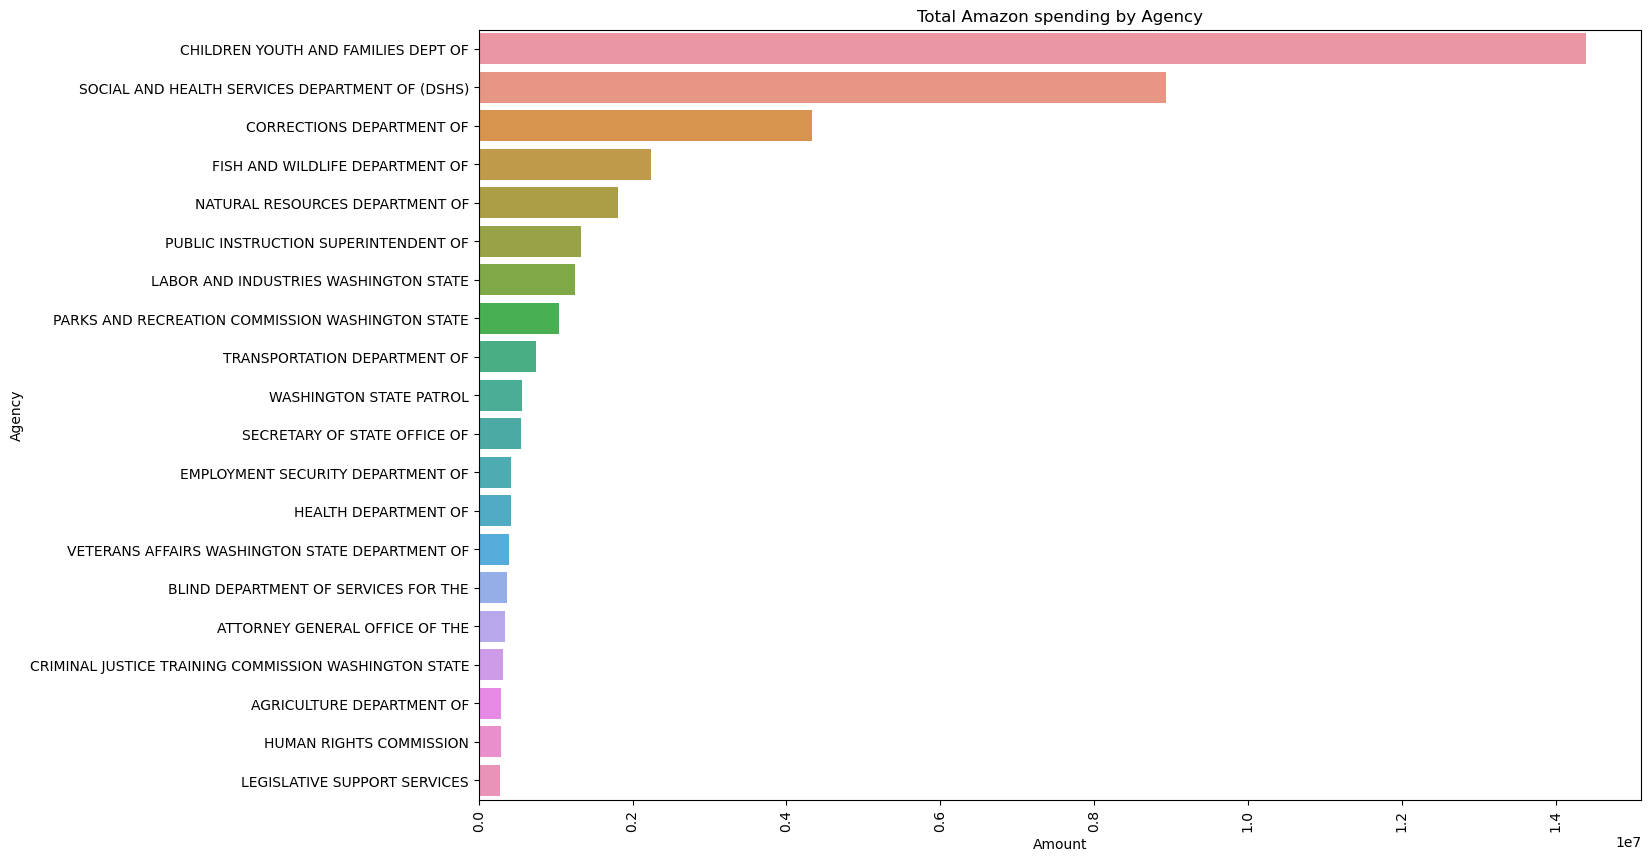

In [9]:
plt.figure(figsize=(15, 10))
sns.barplot(data = top_20_agencies, y="Agency", x= 'Amount')#top_20_agencies['Agency'], top_20_agencies['Agency']
plt.title('Total Amazon spending by Agency')
plt.xticks(rotation=90)
plt.show()

# Below is the variance of spending amount per agency

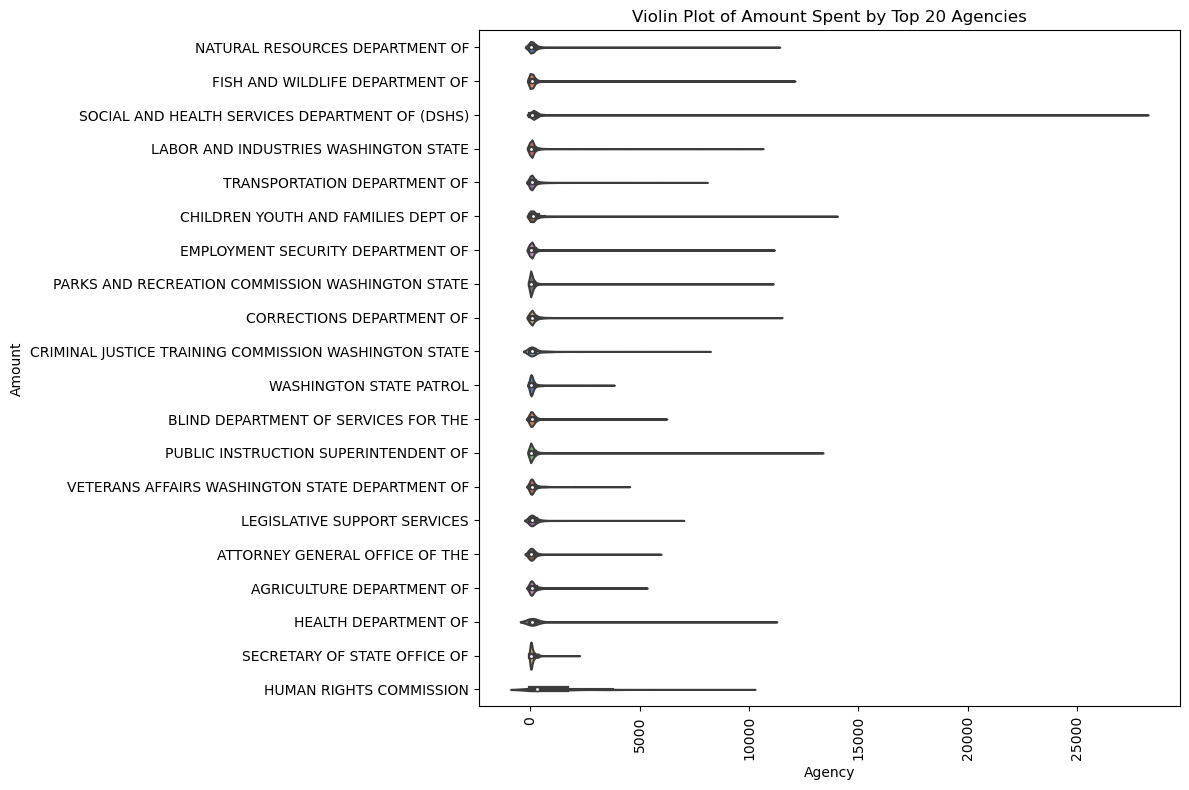

In [10]:
top_20_agency_names = top_20_agencies['Agency']
filtered_df = df_main[df_main['Agency'].isin(top_20_agency_names)]

# Create the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(y='Agency', x='Amount', data=filtered_df, palette='muted')
plt.xlabel('Agency')
plt.ylabel('Amount')
plt.title('Violin Plot of Amount Spent by Top 20 Agencies')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

According to the above graph, Socail and Health Services Department(DSHS) has the most variance in spending; Well over $25,000 and almost double the amount of the average per department. 

# Below is a list of the Top 20 agencies and their top pruchased 'Category'.

Notice that 'Personal Computer' is the most commonly purchased 'Category'.

In [11]:
#-- Create an empty dataframe to store the results. --#
top_category_per_agency = pd.DataFrame(columns=['Agency', 'Top_Category', 'Amount_Spent'])

#-- Iterate over the top 20 agencies --#
for index, row in top_20_agencies.iterrows():
    agency_name = row['Agency']
    agency_df = df_main[df_main['Agency'] == agency_name]
    top_category = agency_df.groupby('Category')['Amount'].sum().idxmax()
    amount_spent = agency_df.groupby('Category')['Amount'].sum().max()
    top_category_per_agency = top_category_per_agency.append({'Agency': agency_name, 'Top_Category': top_category, 'Amount_Spent': amount_spent}, ignore_index=True)

top_category_per_agency

,Agency,Top_Category,Amount_Spent
0,CHILDREN YOUTH AND FAMILIES DEPT OF,Baby Product,3044986.85
1,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),Apparel,1138169.89
2,CORRECTIONS DEPARTMENT OF,Book,434050.07
3,FISH AND WILDLIFE DEPARTMENT OF,Personal Computer,285447.63
4,NATURAL RESOURCES DEPARTMENT OF,Home Improvement,237846.59
5,PUBLIC INSTRUCTION SUPERINTENDENT OF,Office Product,240681.81
6,LABOR AND INDUSTRIES WASHINGTON STATE,Office Product,244838.12
7,PARKS AND RECREATION COMMISSION WASHINGTON STATE,Home Improvement,237086.41
8,TRANSPORTATION DEPARTMENT OF,CE,129073.68
9,WASHINGTON STATE PATROL,"Business, Industrial, & Scientific Supplies Basic",69781.35


# Below a list of the top 20 categories by purchase amount

In [28]:
#-- Outputting the top 20 Categories by Amount --#
top_20_cat = df_main.groupby('Category')['Amount'].sum().nlargest(20).reset_index()
top_20_cat

,Category,Amount
0,Health and Beauty,3826560.91
1,Baby Product,3178205.55
2,Home Improvement,2964189.29
3,Office Product,2797524.28
4,Kitchen,2774812.93
5,Book,2636265.29
6,Personal Computer,2418158.87
7,CE,2371830.02
8,"Business, Industrial, & Scientific Supplies Basic",1905818.19
9,Apparel,1901529.49


# Below is a bar graph of the above list

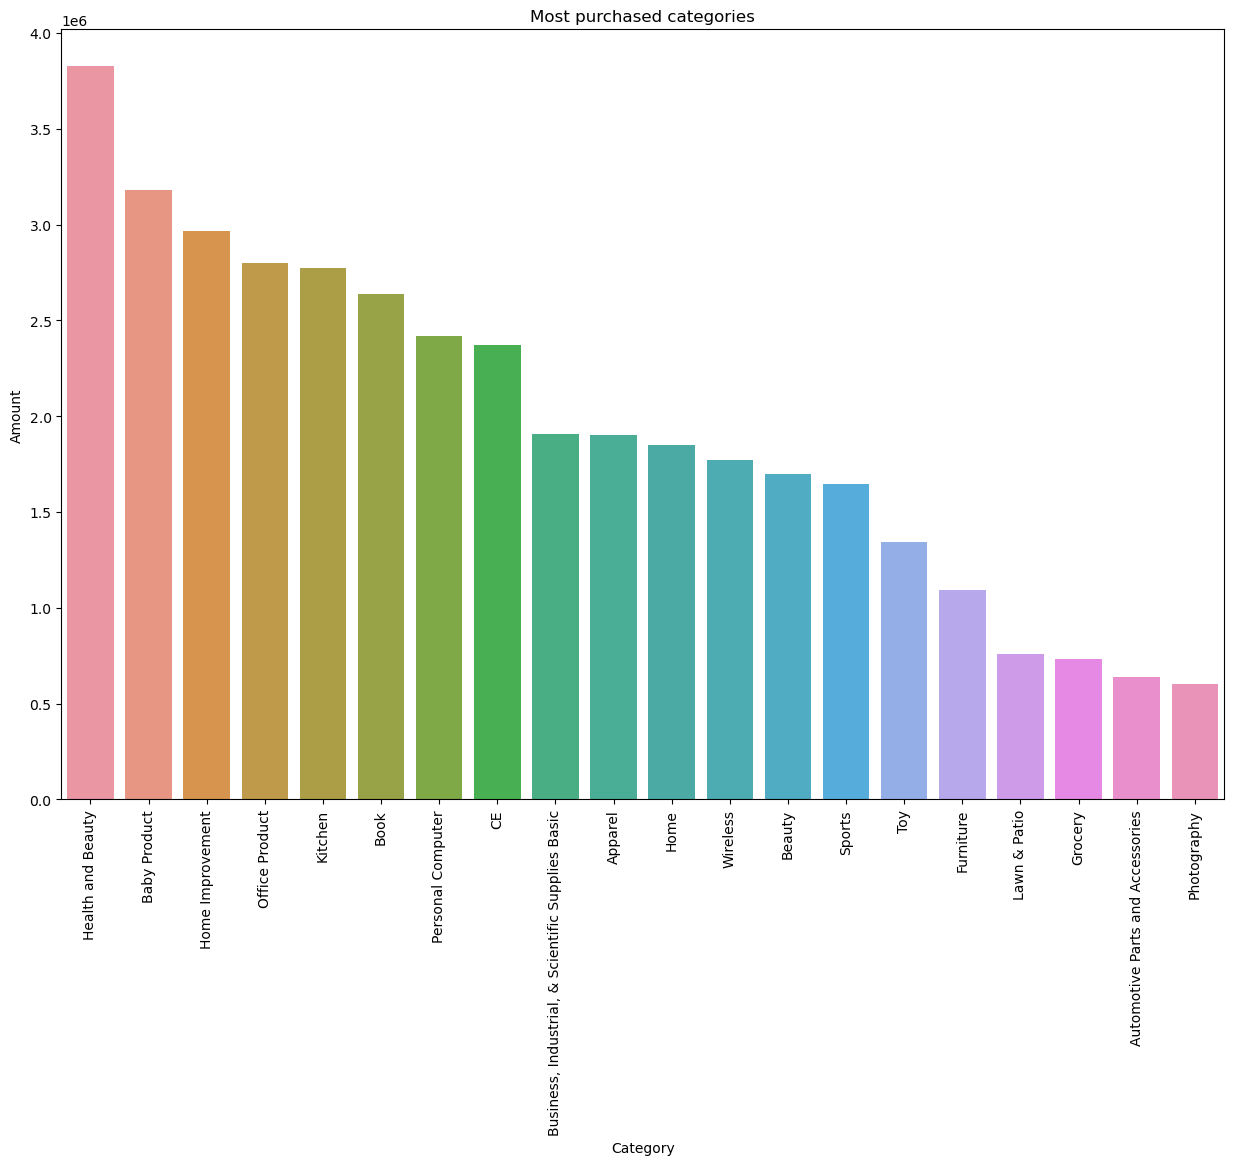

In [29]:
#-- Barplot of the indicating the amount of money donated per year --#
plt.figure(figsize=(15, 10))
sns.barplot(data = top_20_cat, x="Category", y= 'Amount')#top_20_agencies['Agency'], top_20_agencies['Agency']
plt.title('Most purchased categories')
plt.xticks(rotation=90)
plt.show()

# Below is a list of the top spending day by 'Amount' per CHILDREN YOUTH AND FAMILIES

Notice the 'Market Basket' of goods between matching amounts and dates. 

In [30]:
filtered_rows = df_main[df_main['Agency'].str.contains('CHILDREN YOUTH AND FAMILIES DEPT OF')]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
59457,6,23,23,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,12 Pairs Kids Garden Gloves Children Gardening...,13904.87,5,Lawn & Patio
59458,6,23,23,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,Joottuan 6 Pairs Kids Gardening Gloves Yard Wo...,13904.87,5,Lawn & Patio
59455,6,23,23,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,Xylolin Over-Sized Hollow Wooden Block Set for...,13904.87,1,Toy
59456,6,23,23,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,18 Pairs Kids Gardening Gloves Children Garden...,13904.87,5,Lawn & Patio
59850,6,22,23,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,"Topcee Weighted Blanket for Kids(5lbs 36""x48"")...",9733.32,0,Kitchen
180347,8,1,22,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,"Newest HP Notebook Laptop, 15.6"" HD Touchscree...",9379.95,15,Personal Computer
59483,6,23,23,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,"hand2mind Sensory Fidget Tubes, Calming Toys f...",6249.69,5,"Business, Industrial, & Scientific Supplies Basic"
59482,6,23,23,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,Super Z Outlet Liquid Motion Bubbler for Senso...,6249.69,1,Toy
59485,6,23,23,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,"hand2mind Sensory Fidget Tubes, Calming Toys f...",6249.69,19,"Business, Industrial, & Scientific Supplies Basic"
59481,6,23,23,CHILDREN YOUTH AND FAMILIES DEPT OF,NaN,"hand2mind Sensory Fidget Tubes, Calming Toys f...",6249.69,14,"Business, Industrial, & Scientific Supplies Basic"


In [31]:
filtered_rows = df_main[df_main['Agency'].str.contains("SOCIAL AND HEALTH SERVICES DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)
print('TOP 15 items DSHS spends money on:')
filtered_rows_sorted.head(15)

TOP 15 items DSHS spends money on:


,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
69654,6,1,23,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),NaN,Philips HeartStart Home AED Defibrillator with...,28107.80,5,"Business, Industrial, & Scientific Supplies Basic"
69653,6,1,23,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),NaN,Philips HeartStart Home AED Defibrillator with...,28107.80,4,"Business, Industrial, & Scientific Supplies Basic"
78585,5,15,23,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),NaN,Remington WDF4821US Smooth & Silky Electric Sh...,22500.05,31,Beauty
78584,5,15,23,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),NaN,Philips Norelco Shaver 2300 Rechargeable Elect...,22500.05,22,Beauty
78583,5,15,23,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),NaN,Philips Norelco Shaver 2300 Rechargeable Elect...,22500.05,21,Beauty
78582,5,15,23,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),NaN,Remington WDF4821US Smooth & Silky Electric Sh...,22500.05,32,Beauty
93024,4,11,23,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),NaN,Microsoft 8PT-00001 Surface Pro 8 13'' Touchsc...,18171.72,14,Personal Computer
108922,3,2,23,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),NaN,"Microsoft Surface Hub 2 50"" PixelSense Display...",9625.00,1,PC Accessory
96504,4,3,23,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),NaN,APCRBC159-UPC Replacement Battery for APCRBC15...,9514.06,38,CE
40788,2,10,22,SOCIAL AND HEALTH SERVICES DEPARTMENT OF (DSHS),Home Improvement,Jackery,9349.83,17,Home Improvement


In [32]:
filtered_rows = df_main[df_main['Agency'].str.contains("FISH AND WILDLIFE DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
80952,5,9,23,FISH AND WILDLIFE DEPARTMENT OF,NaN,SAMSUNG 75-Inch Class Neo QLED QN90A Series - ...,11979.25,5,Home Theater
61258,6,21,23,FISH AND WILDLIFE DEPARTMENT OF,NaN,Vortex Optics Razor HD Roof Prism Binoculars 1...,9845.19,9,Photography
148683,11,3,22,FISH AND WILDLIFE DEPARTMENT OF,NaN,"Panasonic Toughpad G1, FZ-G1 MK4, i5-6300U 2.4...",8592.10,2,Personal Computer
148684,11,3,22,FISH AND WILDLIFE DEPARTMENT OF,NaN,"Panasonic Toughpad G1, FZ-G1 MK4, i5-6300U 2.4...",8592.10,3,Personal Computer
148685,11,3,22,FISH AND WILDLIFE DEPARTMENT OF,NaN,"Panasonic Toughpad FZ-G1 MK5, Intel Core i5-73...",8592.10,1,Personal Computer
148686,11,3,22,FISH AND WILDLIFE DEPARTMENT OF,NaN,"Panasonic Toughpad G1, FZ-G1 MK4, i5-6300U 2.4...",8592.10,1,Personal Computer
148687,11,3,22,FISH AND WILDLIFE DEPARTMENT OF,NaN,"Panasonic Toughpad G1, FZ-G1 MK4, Intel Core i...",8592.10,1,Personal Computer
3194,6,16,22,FISH AND WILDLIFE DEPARTMENT OF,CE,yealink,6317.15,35,CE
119201,2,2,23,FISH AND WILDLIFE DEPARTMENT OF,NaN,"Panasonic Toughpad G1, FZ-G1 MK4, Intel Core i...",6307.20,2,Personal Computer
119202,2,2,23,FISH AND WILDLIFE DEPARTMENT OF,NaN,"Panasonic Toughpad G1, FZ-G1 MK4, Intel Core i...",6307.20,3,Personal Computer


In [33]:
filtered_rows = df_main[df_main['Agency'].str.contains('CORRECTIONS DEPARTMENT OF')]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
165156,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,18,Book
165169,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,62,Book
165161,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,44,Book
165162,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,47,Book
165159,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,63,Book
165158,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,43,Book
165157,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,64,Book
165163,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,45,Book
165164,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,65,Book
165165,9,19,22,CORRECTIONS DEPARTMENT OF,NaN,"The Coaching Habit: Say Less, Ask More & Chang...",11360.00,58,Book


In [34]:
#-- What books are they buying --#
# Filter rows where 'Agency' is 'CORRECTIONS DEPARTMENT OF' and 'Top_Category' is 'Book'
corrections_books = df_main[(df_main['Agency'] == 'CORRECTIONS DEPARTMENT OF') & (df_main['Category'] == 'Book')]

# Print the resulting DataFrame
corrections_books


,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
166,6,30,22,CORRECTIONS DEPARTMENT OF,Book,Amer Psychiatric Pub Inc,964.96,8,Book
435,6,28,22,CORRECTIONS DEPARTMENT OF,Book,Harper Perennial Modern Classics,140.28,12,Book
436,6,28,22,CORRECTIONS DEPARTMENT OF,Book,Penguin Classics,189.00,12,Book
491,6,28,22,CORRECTIONS DEPARTMENT OF,Book,Tyndale House Publishers,287.70,10,Book
549,6,28,22,CORRECTIONS DEPARTMENT OF,Book,Amer Psychiatric Pub Inc,240.02,2,Book
...,...,...,...,...,...,...,...,...,...
186965,7,11,22,CORRECTIONS DEPARTMENT OF,NaN,Promoting Emotional Resilience: Cognitive-Affe...,49.96,1,Book
187505,7,7,22,CORRECTIONS DEPARTMENT OF,NaN,Mental Status Examination in Neurology,108.26,1,Book
187506,7,7,22,CORRECTIONS DEPARTMENT OF,NaN,Cognitive Assessment for Clinicians,108.26,1,Book
187646,7,7,22,CORRECTIONS DEPARTMENT OF,NaN,Solving the People Problem: Essential Skills Y...,30.37,1,Book


In [35]:
#-- Saving Books to a CSV file --#
# Save the resulting DataFrame to a CSV file
corrections_books.to_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /cleaned sets/corrections_books.csv', index=False)


In [36]:
filtered_rows = df_main[df_main['Agency'].str.contains("NATURAL RESOURCES DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
120274,1,31,23,NATURAL RESOURCES DEPARTMENT OF,NaN,DJI Mavic 2 Pro - Drone Quadcopter UAV with Ha...,11185.42,2,Photography
120273,1,31,23,NATURAL RESOURCES DEPARTMENT OF,NaN,DJI Mavic 2 Fly More Kit for Mavic 2 PRO & Mav...,11185.42,3,Photography
120272,1,31,23,NATURAL RESOURCES DEPARTMENT OF,NaN,DJI Mavic 2 Pro - Drone Quadcopter UAV with Ha...,11185.42,1,Photography
120271,1,31,23,NATURAL RESOURCES DEPARTMENT OF,NaN,Lens Filters for DJI Mavic 2 Pro Camera Lens S...,11185.42,3,Photography
120270,1,31,23,NATURAL RESOURCES DEPARTMENT OF,NaN,"BOSTITCH Hammer Stapler for Construction, 1/4-...",11185.42,1,Home Improvement
120269,1,31,23,NATURAL RESOURCES DEPARTMENT OF,NaN,2-Pack DJI Mavic 2 Intelligent Flight Battery ...,11185.42,3,Home Theater
95415,4,5,23,NATURAL RESOURCES DEPARTMENT OF,NaN,"Goal Zero Yeti 1500X Portable Power Station, 1...",6515.85,3,Home Improvement
101540,3,21,23,NATURAL RESOURCES DEPARTMENT OF,NaN,SAMSUNG 55-Inch Class Crystal 4K UHD AU8000 Se...,5998.30,1,Home Theater
186376,7,12,22,NATURAL RESOURCES DEPARTMENT OF,NaN,"3M 8511 Respirator, N95, Cool Flow Valve (10-P...",5240.67,10,Home Improvement
186372,7,12,22,NATURAL RESOURCES DEPARTMENT OF,NaN,"Igloo Maxcold Medium Ice Block , Blue",5240.67,34,Sports


In [37]:
filtered_rows = df_main[df_main['Agency'].str.contains("PUBLIC INSTRUCTION SUPERINTENDENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
59073,6,26,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,SanDisk Professional 32TB G-RAID Shuttle SSD -...,13271.40,1,Personal Computer
66226,6,8,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,AeroGarden Farm 24XL with Salad Bar Seed Pod K...,5942.34,1,Lawn & Patio
72318,5,25,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,DASH Tasti-CrispTM Electric Air Fryer + Oven C...,3897.73,4,Kitchen
72319,5,25,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,DASH Tasti-CrispTM Electric Air Fryer + Oven C...,3897.73,3,Kitchen
72320,5,25,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,"Stand Mixer Cover,Kitchen Mixer Cover Compatib...",3897.73,7,Kitchen
72317,5,25,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,KitchenAid KSM150PSAQ Artisan Series 5-Qt. Sta...,3897.73,1,Kitchen
120373,1,31,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,Logitech MK545 Advanced Wireless Keyboard and ...,3179.83,3,Personal Computer
120368,1,31,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,HP 27-inch QHD Gaming with Tilt/Height Adjustm...,3179.83,1,Personal Computer
120369,1,31,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,Surge Protector Power Strip - 10 FT Extension ...,3179.83,6,CE
120374,1,31,23,PUBLIC INSTRUCTION SUPERINTENDENT OF,NaN,"Rybozen 4K Audio Video Capture Card, USB 3.0 H...",3179.83,1,Personal Computer


In [38]:
filtered_rows = df_main[df_main['Agency'].str.contains("LABOR AND INDUSTRIES WASHINGTON STATE")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
125295,1,17,23,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,WALI Premium Dual LCD Monitor Desk Mount Fully...,10512.86,2,Office Product
125294,1,17,23,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,WALI Premium Dual LCD Monitor Desk Mount Fully...,10512.86,3,Office Product
159766,10,3,22,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,WALI Premium Dual LCD Monitor Desk Mount Fully...,9654.00,2,Office Product
159765,10,3,22,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,WALI Premium Dual LCD Monitor Desk Mount Fully...,9654.00,3,Office Product
73051,5,24,23,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,8677.90,4,Speakers
73052,5,24,23,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,8677.90,11,Speakers
73053,5,24,23,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,8677.90,8,Speakers
128612,1,6,23,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,7620.00,80,Speakers
184120,7,19,22,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,Tripp Lite ISOBAR8ULTRA Isobar 8 Outlet Surge ...,7228.00,10,Speakers
68198,6,5,23,LABOR AND INDUSTRIES WASHINGTON STATE,NaN,Poly - Voyager 4310 UC Wireless Headset + Char...,5682.95,35,Wireless


In [39]:
filtered_rows = df_main[df_main['Agency'].str.contains("PARKS AND RECREATION COMMISSION WASHINGTON STATE")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
44372,1,27,22,PARKS AND RECREATION COMMISSION WASHINGTON STATE,Personal Computer,Hp Inc,11024.44,28,Personal Computer
49991,12,30,21,PARKS AND RECREATION COMMISSION WASHINGTON STATE,Personal Computer,hp,4922.97,3,Personal Computer
128801,1,5,23,PARKS AND RECREATION COMMISSION WASHINGTON STATE,NaN,LEVEL5 Automatic Drywall Taping and Finishing ...,3411.66,1,Home Improvement
114422,2,15,23,PARKS AND RECREATION COMMISSION WASHINGTON STATE,NaN,Calculated Industries 4019 Material Estimator ...,3249.61,12,Home Improvement
114424,2,15,23,PARKS AND RECREATION COMMISSION WASHINGTON STATE,NaN,Calculated Industries 4019 Material Estimator ...,3249.61,18,Home Improvement
114421,2,15,23,PARKS AND RECREATION COMMISSION WASHINGTON STATE,NaN,Calculated Industries 4019 Material Estimator ...,3249.61,9,Home Improvement
114420,2,15,23,PARKS AND RECREATION COMMISSION WASHINGTON STATE,NaN,Calculated Industries 4019 Material Estimator ...,3249.61,15,Home Improvement
114423,2,15,23,PARKS AND RECREATION COMMISSION WASHINGTON STATE,NaN,Calculated Industries 4019 Material Estimator ...,3249.61,10,Home Improvement
114445,2,15,23,PARKS AND RECREATION COMMISSION WASHINGTON STATE,NaN,"Saunders Metal Clipboard with Storage, Letter ...",3247.40,10,Office Product
114446,2,15,23,PARKS AND RECREATION COMMISSION WASHINGTON STATE,NaN,"Saunders Metal Clipboard with Storage, Letter ...",3247.40,8,Office Product


In [40]:
filtered_rows = df_main[df_main['Agency'].str.contains("TRANSPORTATION DEPARTMENT OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
40036,2,14,22,TRANSPORTATION DEPARTMENT OF,Home,IQAir,7929.20,8,Home
40035,2,14,22,TRANSPORTATION DEPARTMENT OF,Home,IQAir,5946.90,6,Home
68159,6,5,23,TRANSPORTATION DEPARTMENT OF,NaN,Billy Goat BC2600ICM Briggs Fixed Deck Brush C...,5009.39,1,"Business, Industrial, & Scientific Supplies Basic"
155098,10,17,22,TRANSPORTATION DEPARTMENT OF,NaN,Vibe Gel Memory Foam 12-Inch Mattress | CertiP...,4481.00,1,Furniture
155264,10,14,22,TRANSPORTATION DEPARTMENT OF,NaN,"HONEYWELL, XENON 1900, STAND, GRAY, 15CM, (6) ...",4035.20,10,Personal Computer
155263,10,14,22,TRANSPORTATION DEPARTMENT OF,NaN,Honeywell 1900GSR-2-2 Xenon Series 1900 Area-I...,4035.20,10,"Business, Industrial, & Scientific Supplies Basic"
157771,10,7,22,TRANSPORTATION DEPARTMENT OF,NaN,Pelican Color Case Black & Blue Pelican 1535 A...,3797.08,14,CE
74624,5,22,23,TRANSPORTATION DEPARTMENT OF,NaN,"Acer B276HUL Aymiidprz 27"" WQHD (2560 x 1440) ...",3589.68,8,Personal Computer
54326,12,9,21,TRANSPORTATION DEPARTMENT OF,Kitchen,Fortnight Bedding,3583.19,13,Kitchen
140299,11,30,22,TRANSPORTATION DEPARTMENT OF,NaN,CST/berger 19-202SC MagnaTrak 202 Series Magne...,3181.35,5,Home Improvement


In [41]:
filtered_rows = df_main[df_main['Agency'].str.contains("SECRETARY OF STATE OFFICE OF")]
filtered_rows_sorted = filtered_rows.sort_values(by='Amount', ascending=False)
filtered_rows_sorted.head(15)

,Month,Day,Year,Agency,Category,desc,Amount,Item_Qty,Category
28225,3,29,22,SECRETARY OF STATE OFFICE OF,Kitchen,BRODAN,2187.90,2,Kitchen
79176,5,12,23,SECRETARY OF STATE OFFICE OF,NaN,Electro-Voice RE20 Broadcast Announcer Microph...,1966.64,4,Musical Instruments
90041,4,19,23,SECRETARY OF STATE OFFICE OF,NaN,"2Pcs Expanding File Folder, 13 Pockets Accordi...",1886.52,2,Office Product
90045,4,19,23,SECRETARY OF STATE OFFICE OF,NaN,"Flat Plug Extension Cord 25 ft, NTONPOWER Powe...",1886.52,1,CE
90047,4,19,23,SECRETARY OF STATE OFFICE OF,NaN,"Gimbal Stabilizer for Smartphone, 3-Axis Phone...",1886.52,1,Photography
90048,4,19,23,SECRETARY OF STATE OFFICE OF,NaN,"Zoom LBC-1 Li-Ion Battery Charger, Charges the...",1886.52,1,Musical Instruments
90049,4,19,23,SECRETARY OF STATE OFFICE OF,NaN,KROSER Laptop Bag Stylish Laptop Briefcase Fit...,1886.52,1,Personal Computer
90050,4,19,23,SECRETARY OF STATE OFFICE OF,NaN,Endurax Large Camera Backpack Waterproof Compa...,1886.52,1,Luggage
90052,4,19,23,SECRETARY OF STATE OFFICE OF,NaN,"Amazon Basics Expanding Organizer File Folder,...",1886.52,2,Office Product
90051,4,19,23,SECRETARY OF STATE OFFICE OF,NaN,XGIMI Carry Case for Halo/H2/Horizon/Horizon Pro,1886.52,1,Luggage


# Below is a WordCloud output of the product descriptions; Word size indicates frequency. 

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  Image.ROTATE_90)
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Ima

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/wordcloud/wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
/Use

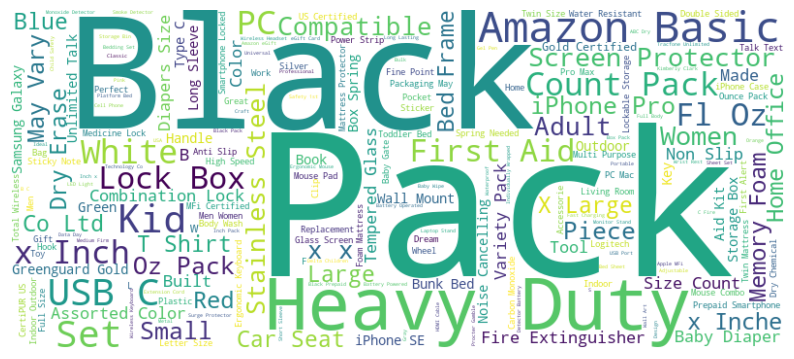

In [42]:
#-- Concatenate all text data into a single string --#
text = ' '.join(df_main["desc"])

#-- Generate the word cloud --#
wordcloud = WordCloud(width=800, height=350, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the above WordCloud, it would appear the Government likes 'Heavy Duty' and perfers the color 'Black' while white is a trailing second color preference.  

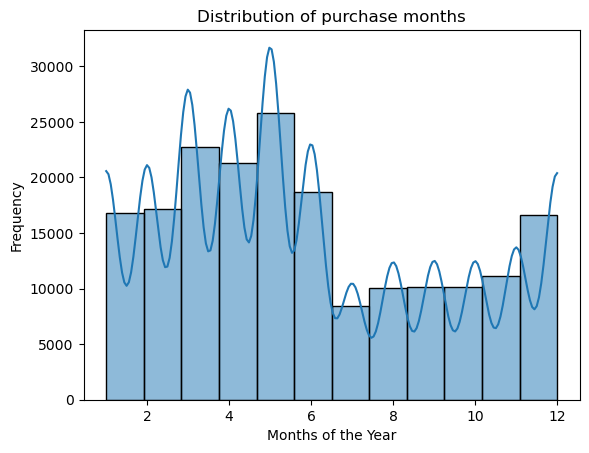

In [12]:
#-- Create a histogram of purchase months --#
sns.histplot(
    data=df_main,      
    x="Month",  
    bins=12,          
    kde=True          
)
#-- Add a title and axis labels --#
plt.title("Distribution of purchase months")
plt.xlabel("Months of the Year")
plt.ylabel("Frequency")
# Show the plot
plt.show()

From the above graph, it appears that March, April, May, and June are the highest months, then the months remain constaint. Almost as if all departments recieved a repremanding email in July, then stayed very consistant at the 11,000 mark; Continuing from August to December. 

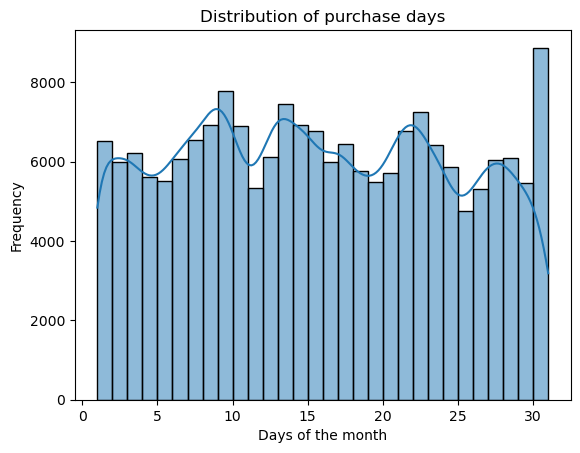

In [14]:
#-- Create a histogram of Days --#
sns.histplot(
    data=df_main,        # Data source
    x="Day",  # Variable for the histogram
    bins=30,          # Number of bins (optional, defaults to 30)
    kde=True          # Add a kernel density estimate (optional)
)# Add a title and axis labels
plt.title("Distribution of purchase days")
plt.xlabel("Days of the month")
plt.ylabel("Frequency")
# Show the plot
plt.show()

From the above graph, the purchase days of the week stay random, however approximently 5000 Amazon orders a day. 

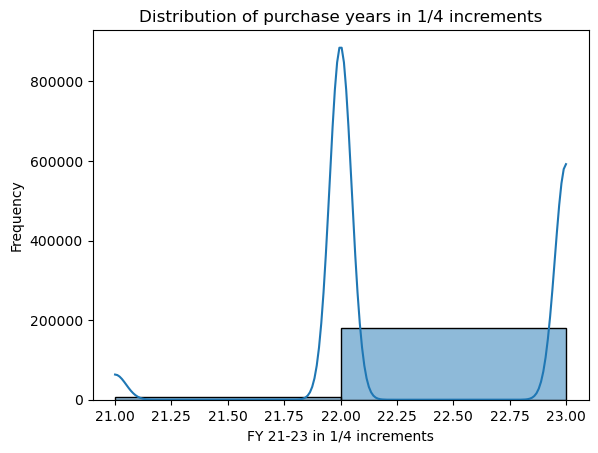

In [17]:
#-- Create a histogram of Purchase Year --#
sns.histplot(
    data=df_main,        # Data source
    x="Year",  # Variable for the histogram
    bins=2,          # Number of bins (optional, defaults to 10)
    kde=True          # Add a kernel density estimate (optional)
)# Add a title and axis labels
plt.title("Distribution of purchase years in 1/4 increments")
plt.xlabel("FY 21-23 in 1/4 increments")
plt.ylabel("Frequency")
# Show the plot
plt.show()

It would appear that spending has exponentiated from 2021 to 2023

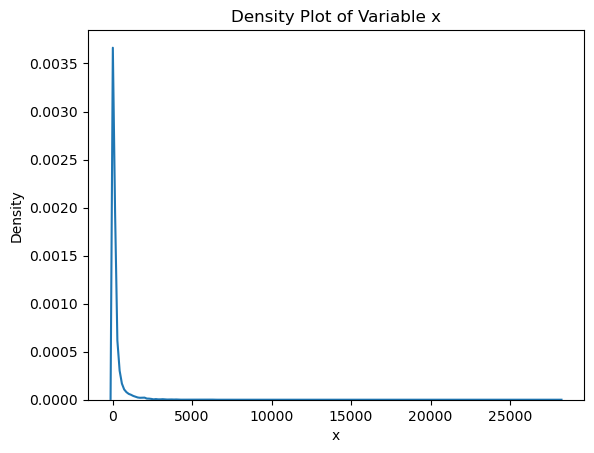

In [46]:
#-- Create a density plot for variable 'x' --#
sns.kdeplot(
    data=df_main,
    x="Amount"  # Variable to plot the density of
)

# Add a title and axis labels
plt.title("Density Plot of Variable x")
plt.xlabel("x")
plt.ylabel("Density")

# Show the plot
plt.show()

In [47]:
#-- Converting categorical binary with the get_dummies() function --#

dummy_categories = pd.get_dummies(df_main['Category'], drop_first=True)

dummy_categories
df1 = pd.concat([df_main['Amount'], dummy_categories], axis=1)
df1

,Amount,Amazon Basics,Amazon Devices,Amazon Ereaders,Amazon Home,Amazon SMP,Amazon Smart Home Devices,Amazon Tablets,Apparel,Art,...,Target Outdoor Sporting,Target Toys,Toy,Trading Cards,VDO Devices,Video Games,Watch,Wireless,Woodworking Tools,eBooks
0,323.89,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.86,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,24.85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23.76,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,26.98,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188945,540.91,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188946,540.91,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188947,540.91,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188948,31.37,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Step 3 Analysis with Machine Learning 

# Now exploring the data with the Unsupervised Machine Learning models of Principal Component Analysis and KMeans Cluster Analysis. 

The dataset is decomposed in to Eigen vectors of Eigen values or Principal Components PCs. The variences of PCs are explored in the following two graphs. 

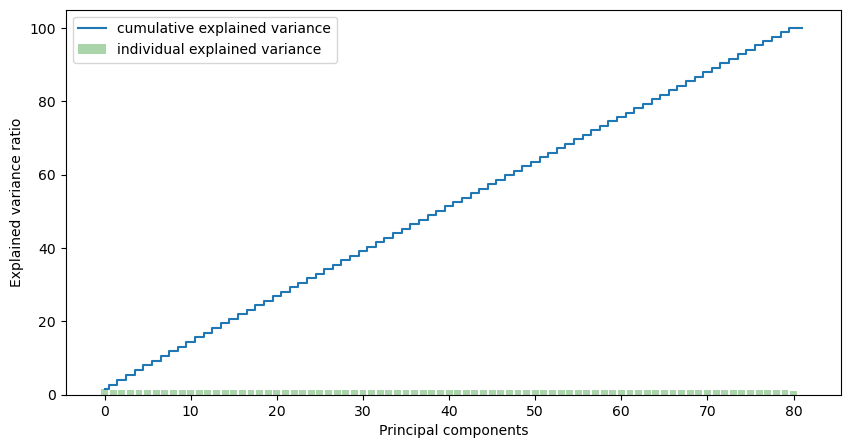

In [48]:
#-- Scaling the data --#
#-- Create the object --#
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df1)
 #-- Calculate the mean and Standard deviation --#
#-- Conducting PCA --#
#-- Calculating Eigenvectors and eigenvalues of Cov matrix --#
mean_vec = np.mean(df_scaled, axis=0)
cov_mat = np.cov(df_scaled.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
#-- Create a list of (eigenvalue, eigenvector) tuples --#
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
#-- Sort from high to low --#
eig_pairs.sort(key = lambda x: x[0], reverse= True)
 
#-- Calculation of Explained Variance from the eigenvalues --#
tot = sum(eig_vals)
#-- Individual explained variance --#
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] 
#-- Cumulative explained variance --#
cum_var_exp = np.cumsum(var_exp)
 
#-- Plot out the variances superimposed --#
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'K-means with PCA clustering ')

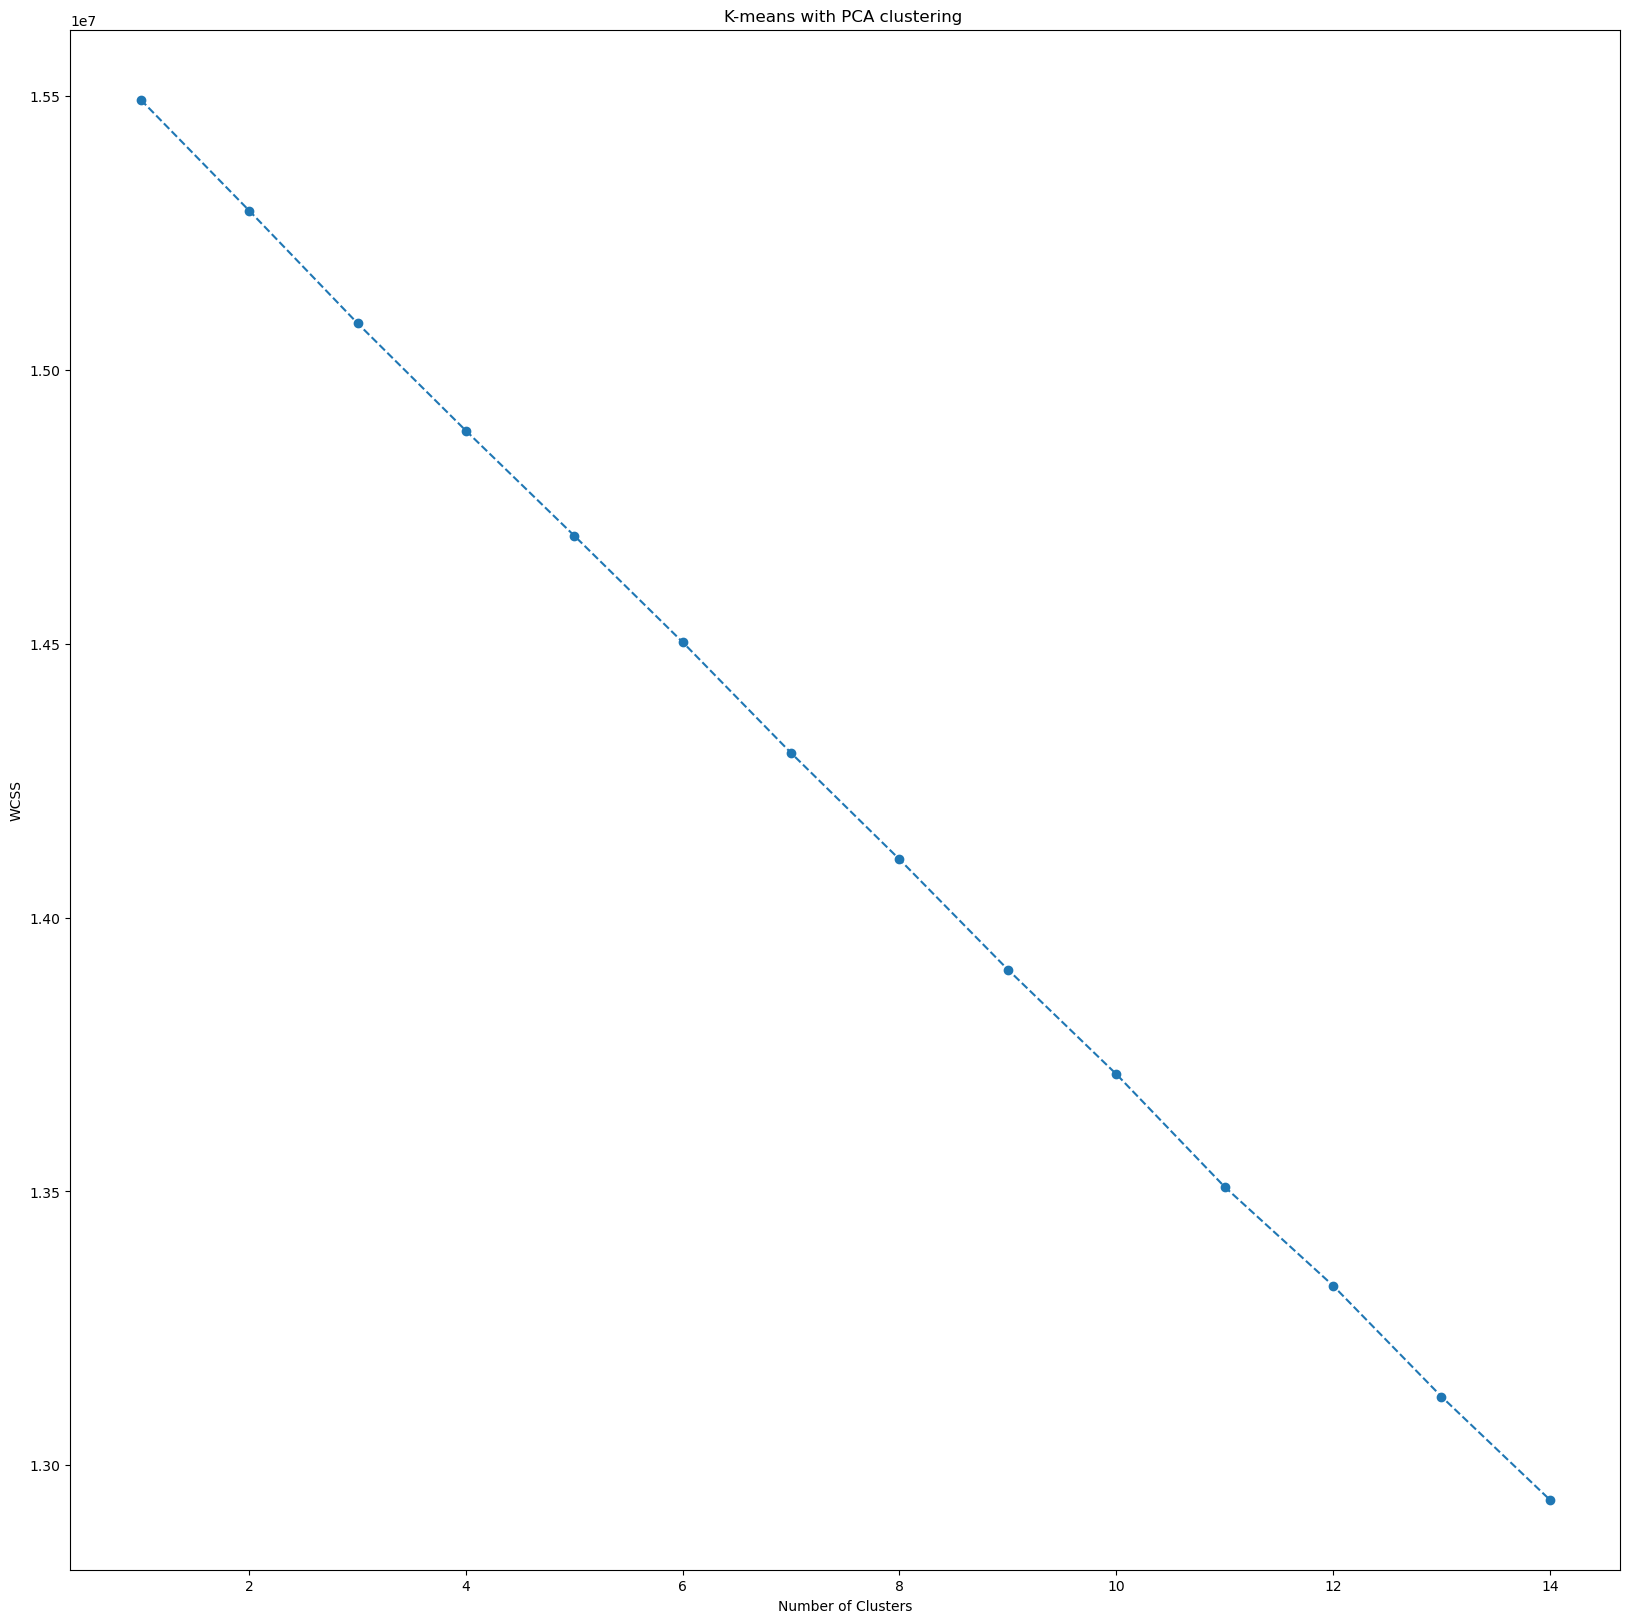

In [49]:
#-- Determining the number of clusters with the Elbow Method --#
#-- Kmeans clustering with PCA --#
wcss = [] #-- sum of squares of distances of datapoints --#
for i in range(1,15):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans_pca.fit(df_scaled)
    wcss.append(kmeans_pca.inertia_)
 
#-- Now plotting the Elbow Graph --#
plt.figure(figsize = (20,20))
plt.plot(range(1,15), wcss, marker ='o', linestyle ='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA clustering ')

The above graph indicates no distinct 'elbow' for the Kiaser criterion. Therefore all PCs have equal variance in vectorspace. 

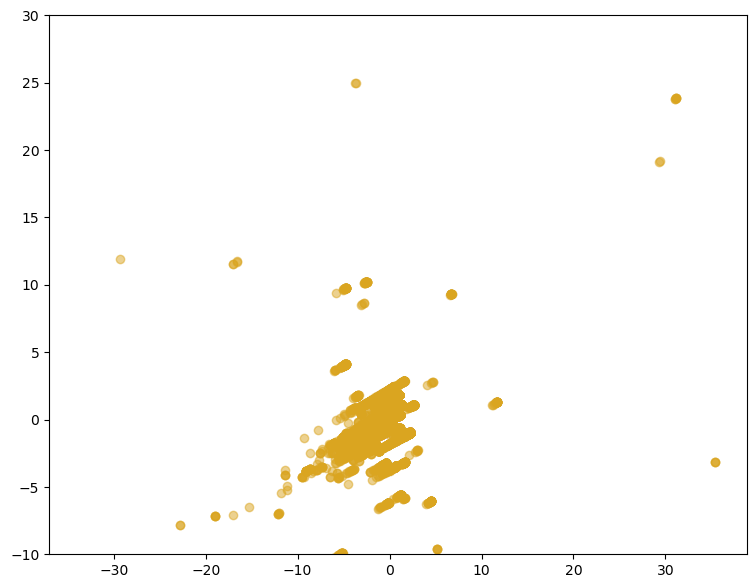

In [50]:
#-- Exploring how the data clusters when transformed with PCA and ‘k’ =1 --#

pca = PCA(n_components=22)

pca_kmeans = pca.fit_transform(df_scaled)

plt.figure(figsize = (9,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,1], c='goldenrod',alpha=0.5)

plt.ylim(-10,30)

plt.show()

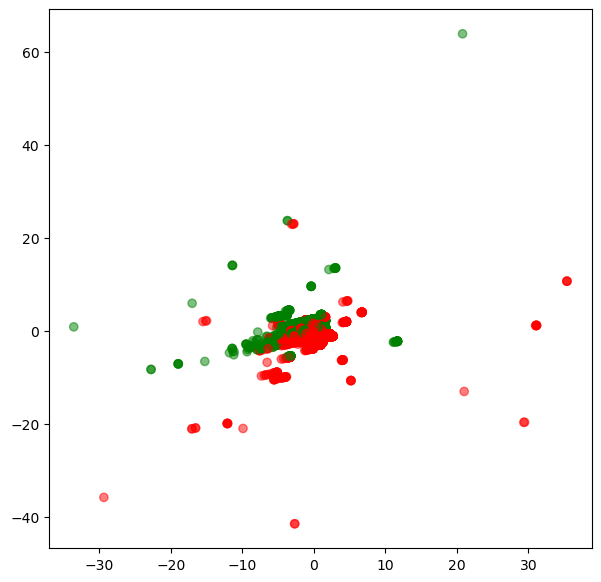

In [51]:
#-- Now running KMeans with 2 clusters --#

kmeans_pca = KMeans(n_clusters =2, init = 'k-means++', random_state = 42)

#-- Kmeans with two clusters --#

#-- Compute cluster centers by fitting the data to the model and predict cluster indices --#

X_clustered = kmeans_pca.fit_predict(pca_kmeans)

#-- Define our own color map--#

LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,2], c= label_color, alpha=0.5) 

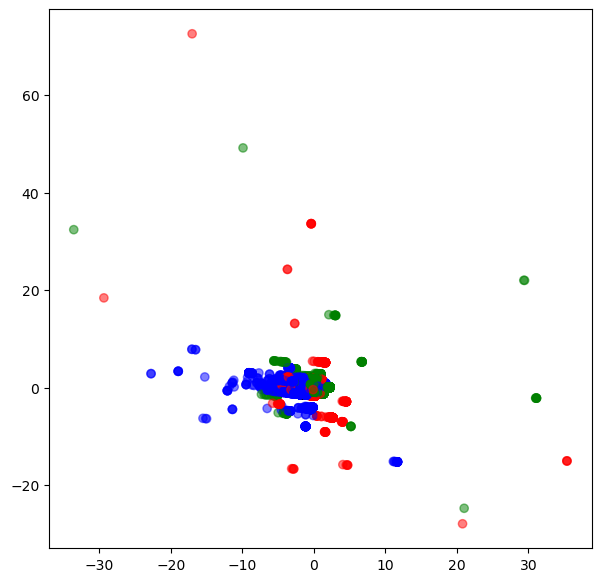

In [52]:
### -- Now setting  'k' = 3 clusters --#

kmeans = KMeans(n_clusters=3)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

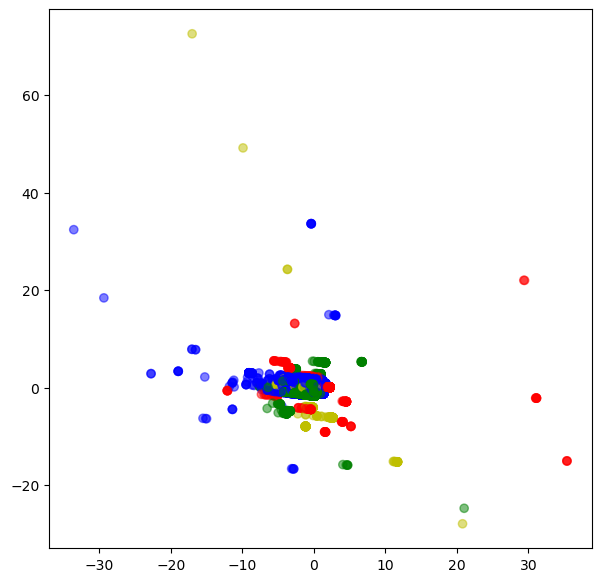

In [53]:
#-- Now setting  'k' = 4 clusters --#

kmeans = KMeans(n_clusters=4)

# Compute cluster centers and predict cluster indices

X_clustered = kmeans.fit_predict(pca_kmeans) 

#-- Define the color map --#

LABEL_COLOR_MAP = {0: 'r', 1: 'g', 2: 'b', 3: 'y', 4: 'c', 5: 'm', 6: 'k'} 

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

#-- Plot the scatter digram --#

plt.figure(figsize = (7,7))

plt.scatter(pca_kmeans[:,0],pca_kmeans[:,3], c= label_color, alpha=0.5) 

plt.show()

The above KMeans cluster visualizations appear to be a dense random blog with scatterings of hapazard residuals.

# Now conduction Market Basket Analysis

In [54]:
#-- Importing the parsed dataset for Market Basket Analysis --#

dfbi = pd.read_csv('/Users/michaelsegaline/Desktop/Research Objectives/Washington State Amazon spendng /Washington cleaned purchasing .csv')

In [55]:
dfbi.head()

,Apparel,Art and Craft Supply,Automotive Parts and Accessories,Baby Product,Beauty,Book,"Business, Industrial, & Scientific Supplies Basic",CE,Electronic Gift Card,Furniture,...,Personal Computer,Pet Products,Photography,Prestige Beauty,Shoes,Speakers,Sports,Toy,Video Games,Wireless
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
dfbi.shape

(143926, 31)

In [57]:
#-- Passing the entire Dataframe into a correlation Matrix --#
correlation_matrix = dfbi.corr()

<AxesSubplot:>

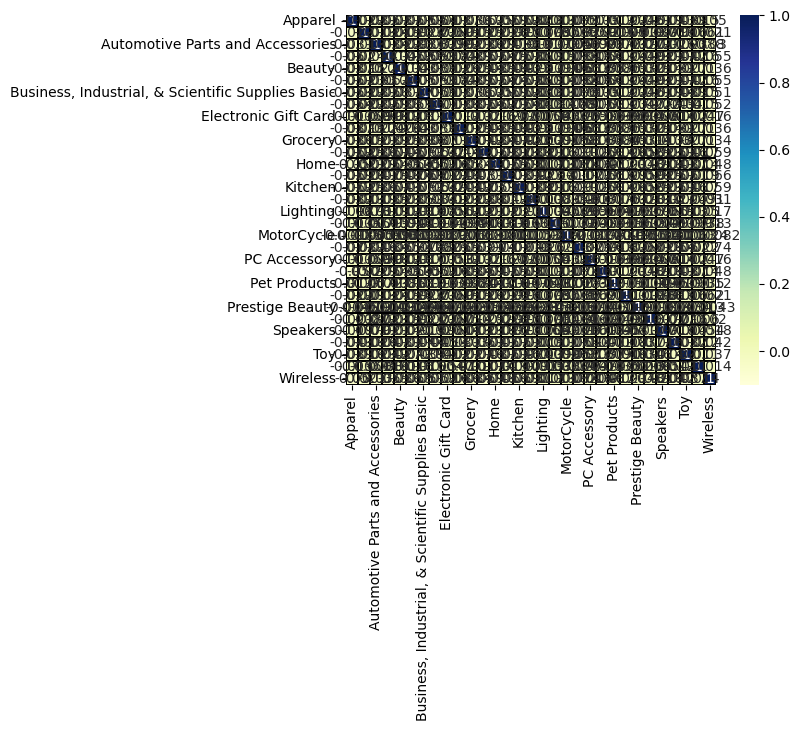

In [58]:
# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# The above correlation matrix is too messy to decern. The dataframe must be split up for further exploration.

# Splitting the large dataset into four seperate datasets: 'a' and 'b' are the 1st half and 2nd half of the variables. Addtionally, 'kids' and 'electronics' are grouped together for exploration. 

In [59]:
a = dfbi[['Apparel','Art and Craft Supply','Automotive Parts and Accessories','Baby Product','Beauty','Book','Business, Industrial, & Scientific Supplies Basic','CE','Electronic Gift Card','Furniture','Grocery','Health and Beauty','Toy']]
b = dfbi[['Kitchen','Lawn & Patio','Lighting','Luggage','MotorCycle','Office Product','PC Accessory','Personal Computer','Pet Products','Photography','Speakers','Sports','Toy','Video Games','Wireless' ]]
kids = dfbi[['Apparel','Art and Craft Supply','Baby Product','Beauty','Book','Grocery','Health and Beauty','Toy','Shoes','Video Games','Sports','Luggage','Prestige Beauty']]
electronics = dfbi[['Speakers','Lighting','Office Product','PC Accessory','Personal Computer','Video Games','Wireless']]

In [60]:
#-- Making Seperate matrices for correlation exploration --#
matrix1 = a.corr()
matrix2 = b.corr()
matrix3 = kids.corr()
matrix4 = electronics.corr()

# Displaying correlations between random set 'a'.

<AxesSubplot:>

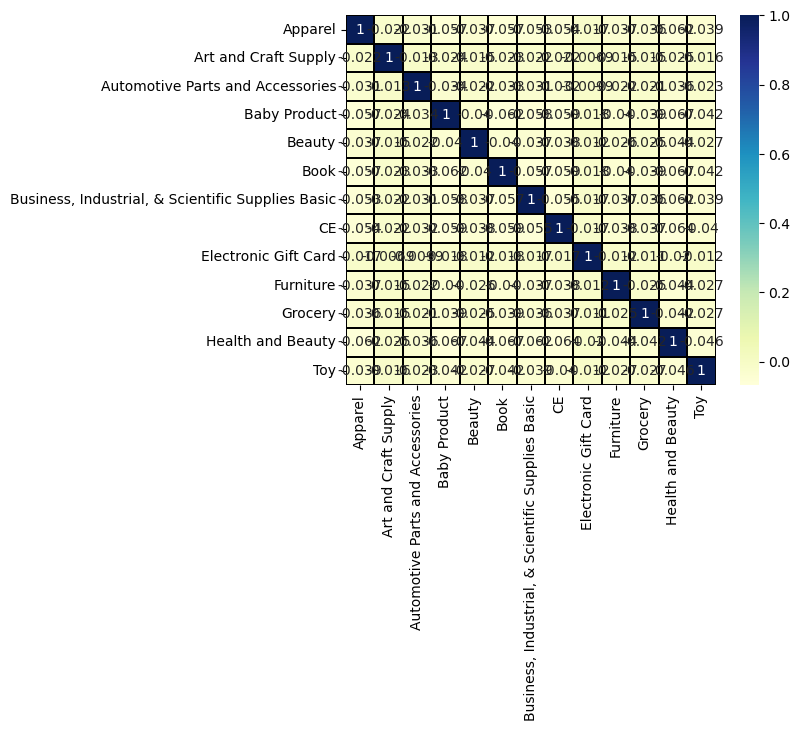

In [61]:
# Draw the heatmap using seaborn
sns.heatmap(matrix1, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# Displaying Correlations between set 'b'

<AxesSubplot:>

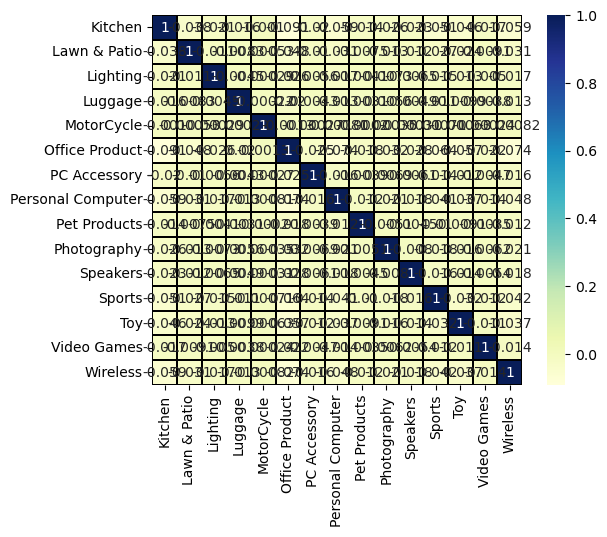

In [62]:
sns.heatmap(matrix2, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)


# Exploring Correlations between the 'kids' iteams

<AxesSubplot:>

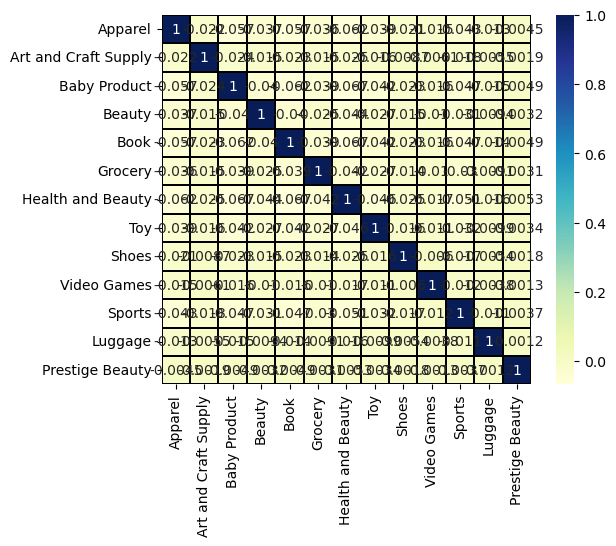

In [63]:
sns.heatmap(matrix3, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)


# Exploring corrleations between 'electronics' items. 

<AxesSubplot:>

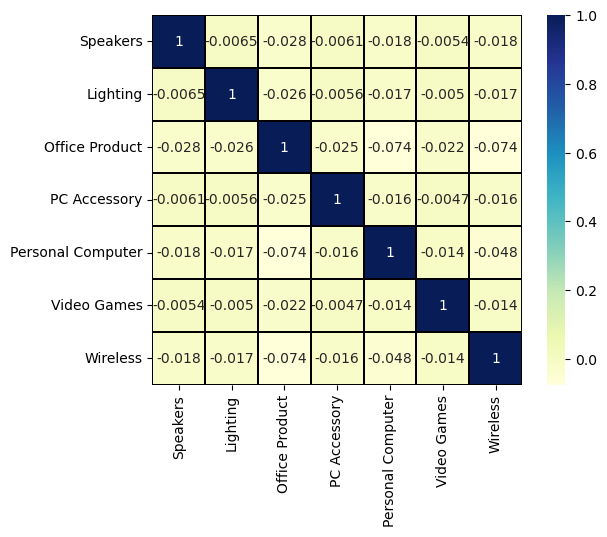

In [64]:
sns.heatmap(matrix4, linewidths=0.25, vmax=1.0, square=True, cmap="YlGnBu", linecolor='black', annot=True)

# Now running Market Basket Analysis to explore possible co-occurances of items being purhcased together. 

In [65]:
#-- Each row represents a transaction, and each column represents an item --#
transactions = dfbi.values.tolist()

frequent_itemsets = apriori(dfbi, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(20)

/Users/michaelsegaline/opt/anaconda3/lib/python3.9/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


The above Market Basket Analysis yeilded no association rules to describe the frequency of itemssets purchased together with a minimum support of 1%. Not suprising considering that the correlation matrices yeild minimal correlation between columns. Moreover, two years of data is not enough for predictive statistics. Predictive statistics is difficult given the unsemetrical pattern presented in KMeans visualizations
  
However, from the data the following industry intelligence was mined:

We accept the null hypothesis H0: There is NO association between the purchase of two or more products.

These findings and processed datasets can be compiled and compared with all and other states purchasing behavior in the United States. More compiled data over time can then be used to possibly produce accurate forecast models. 

The number of repeat purhcases as reduced from 88% (from 2021-22) to 8% in 2023
However, the spending from FY 22-23 has exponentated dramatically.
The iteams purchased are random and not predictable for cross-purchasing or bundling.

The target vairable 'Amount' was passed into numerous predictive machine learning models but no accurate score was yielded. More data needs to be compiled.  
